In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import os
import copy

In [2]:
class translate_dict(object):
    def __init__(self):
        chrtab = """Chromosome 1	CM000093.5	=	NC_006088.5	7
Chromosome 2	CM000094.5	=	NC_006089.5	0
Chromosome 3	CM000095.5	=	NC_006090.5	4
Chromosome 4	CM000096.5	=	NC_006091.5	0
Chromosome 5	CM000097.5	=	NC_006092.5	0
Chromosome 6	CM000098.5	=	NC_006093.5	6
Chromosome 7	CM000099.5	=	NC_006094.5	0
Chromosome 8	CM000100.5	=	NC_006095.5	0
Chromosome 9	CM000101.5	=	NC_006096.5	1
Chromosome 10	CM000102.5	=	NC_006097.5	0
Chromosome 11	CM000103.5	=	NC_006098.5	0
Chromosome 12	CM000104.5	=	NC_006099.5	0
Chromosome 13	CM000105.5	=	NC_006100.5	1
Chromosome 14	CM000106.5	=	NC_006101.5	1
Chromosome 15	CM000107.5	=	NC_006102.5	1
Chromosome 16	CM000108.5	=	NC_006103.5	1
Chromosome 17	CM000109.5	=	NC_006104.5	0
Chromosome 18	CM000110.5	=	NC_006105.5	0
Chromosome 19	CM000111.5	=	NC_006106.5	1
Chromosome 20	CM000112.5	=	NC_006107.5	0
Chromosome 21	CM000113.5	=	NC_006108.5	0
Chromosome 22	CM000114.5	=	NC_006109.5	1
Chromosome 23	CM000115.5	=	NC_006110.5	6
Chromosome 24	CM000116.5	=	NC_006111.5	0
Chromosome 25	CM000124.5	=	NC_006112.4	1
Chromosome 26	CM000117.5	=	NC_006113.5	0
Chromosome 27	CM000118.5	=	NC_006114.5	0
Chromosome 28	CM000119.5	=	NC_006115.5	1
Chromosome 30	CM003637.2	=	NC_028739.2	0
Chromosome 31	CM003638.2	=	NC_028740.2	3
Chromosome 32	CM000120.4	=	NC_006119.4	0
Chromosome 33	CM000123.5	=	NC_008465.4	1
Chromosome W	CM000121.5	=	NC_006126.5	52
Chromosome Z	CM000122.5	=	NC_006127.5""".split('\n')
        chrtab = [i.split('\t') for i in chrtab]
        self.chrdf = pd.DataFrame(chrtab)[[0,3]]
        self.chrdf[0] = [i.split(' ')[1] for i in self.chrdf[0]]
        self.chrdf.columns = ['chrnum', 'name']
        
        chr_ranks='''NC_006088.5	197608386	1
NW_020109737.1	1765	419
NW_020109738.1	2384	398
NW_020109739.1	4675	344
NW_020109740.1	5861	323
NW_020109741.1	10869	221
NW_020109742.1	21511	103
NW_020109743.1	22289	97
NC_006089.5	149682049	2
NC_006090.5	110838418	3
NW_020109744.1	509	457
NW_020109745.1	1783	417
NW_020109746.1	6272	316
NW_020109747.1	7246	291
NC_006091.5	91315245	4
NC_006092.5	59809098	6
NC_006093.5	36374701	8
NW_020109748.1	4087	358
NW_020109749.1	4448	350
NW_020109750.1	5224	334
NW_020109751.1	10724	223
NW_020109752.1	10928	219
NW_020109753.1	18845	121
NC_006094.5	36742308	7
NC_006095.5	30219446	9
NC_006096.5	24153086	10
NW_020109754.1	27963	67
NC_006097.5	21119840	11
NC_006098.5	20200042	13
NC_006099.5	20387278	12
NC_006100.5	19166714	14
NW_020109755.1	2157	403
NC_006101.5	16219308	15
NW_020109756.1	765	448
NC_006102.5	13062184	17
NW_020109757.1	2034	408
NC_006103.5	2844601	32
NW_020109758.1	149503	45
NC_006104.5	10762512	19
NC_006105.5	11373140	18
NC_006106.5	10323212	20
NW_020109759.1	1131	438
NC_006107.5	13897287	16
NC_006108.5	6844979	23
NC_006109.5	5459462	29
NW_020109760.1	918	444
NC_006110.5	6149580	27
NW_020109761.1	322	460
NW_020109762.1	1264	435
NW_020109763.1	1662	424
NW_020109764.1	15003	161
NW_020109765.1	16157	142
NW_020109766.1	18922	120
NC_006111.5	6491222	25
NC_006112.4	3980610	31
NW_020109767.1	1884	413
NC_006113.5	6055710	28
NC_006114.5	8080432	21
NC_006115.5	5116882	30
NW_020109768.1	1519	430
NC_028739.2	1818525	36
NC_028740.2	6153034	26
NW_020109769.1	9481	245
NW_020109770.1	11305	211
NW_020109771.1	11340	210
NC_006119.4	725831	39
NC_008465.4	7821666	22
NW_020109772.1	182	463
NC_006126.5	6813114	24
NW_020109775.1	1568	428
NW_020109776.1	2003	410
NW_020109777.1	2092	405
NW_020109778.1	3094	376
NW_020109779.1	5587	329
NW_020109780.1	6668	306
NW_020109781.1	6830	299
NW_020109782.1	6929	295
NW_020109783.1	7074	293
NW_020109784.1	7765	283
NW_020109785.1	7878	282
NW_020109786.1	8166	274
NW_020109787.1	8267	269
NW_020109788.1	8275	268
NW_020109789.1	8559	264
NW_020109790.1	8909	256
NW_020109791.1	9034	251
NW_020109792.1	9182	248
NW_020109793.1	9607	242
NW_020109794.1	10106	231
NW_020109795.1	10162	230
NW_020109796.1	10224	229
NW_020109797.1	10371	227
NW_020109798.1	10551	225
NW_020109799.1	10871	220
NW_020109800.1	11068	215
NW_020109801.1	12127	200
NW_020109802.1	12728	192
NW_020109803.1	13691	180
NW_020109804.1	13829	177
NW_020109805.1	14047	174
NW_020109806.1	14330	169
NW_020109807.1	14810	162
NW_020109808.1	15438	154
NW_020109809.1	16043	146
NW_020109810.1	16320	139
NW_020109811.1	17217	134
NW_020109812.1	17224	133
NW_020109813.1	17321	131
NW_020109814.1	17442	129
NW_020109815.1	18028	128
NW_020109816.1	19032	118
NW_020109817.1	19204	116
NW_020109818.1	19471	115
NW_020109819.1	19721	113
NW_020109820.1	19850	112
NW_020109821.1	19928	110
NW_020109822.1	22964	92
NW_020109823.1	23209	89
NW_020109824.1	24105	85
NW_020109825.1	27808	69
NW_020109826.1	28212	66
NC_006127.5	82529921	5
NW_020109829.1	15587	152
NW_020109830.1	27104	71
NW_020109831.1	27130	70
NW_020109832.1	27830	68
NW_020109833.1	28243	65
NW_020109834.1	29697	64
NW_020109835.1	30157	63
NW_020109836.1	30225	62
NW_020109837.1	30439	61
NW_020109838.1	30818	60
NW_020109839.1	33030	59
NW_020109840.1	33083	58
NW_020109841.1	33731	56
NW_020109842.1	33531	57
NW_020109843.1	33802	55
NW_020109844.1	87	464
NW_020109845.1	246	461
NW_020109846.1	195	462
NW_020109847.1	345	458
NW_020109848.1	342	459
NW_020109849.1	579	455
NW_020109850.1	555	456
NW_020109851.1	623	453
NW_020109852.1	597	454
NW_020109853.1	676	451
NW_020109854.1	644	452
NW_020109855.1	678	449
NW_020109856.1	677	450
NW_020109857.1	806	446
NW_020109858.1	791	447
NW_020109859.1	950	443
NW_020109860.1	848	445
NW_020109861.1	966	441
NW_020109862.1	955	442
NW_020109863.1	1115	439
NW_020109864.1	1086	440
NW_020109865.1	1173	436
NW_020109866.1	1167	437
NW_020109867.1	1381	433
NW_020109868.1	1367	434
NW_020109869.1	1453	431
NW_020109870.1	1394	432
NW_020109871.1	1579	427
NW_020109872.1	1547	429
NW_020109873.1	1643	425
NW_020109874.1	1589	426
NW_020109875.1	1748	422
NW_020109876.1	1664	423
NW_020109877.1	1756	420
NW_020109878.1	1752	421
NW_020109879.1	1800	416
NW_020109880.1	1782	418
NW_020109881.1	1840	414
NW_020109882.1	1834	415
NW_020109883.1	1935	411
NW_020109884.1	1908	412
NW_020109885.1	2071	407
NW_020109886.1	2033	409
NW_020109887.1	2149	404
NW_020109888.1	2087	406
NW_020109889.1	2260	401
NW_020109890.1	2214	402
NW_020109891.1	2308	399
NW_020109892.1	2262	400
NW_020109893.1	2462	396
NW_020109894.1	2402	397
NW_020109895.1	2520	394
NW_020109896.1	2481	395
NW_020109897.1	2566	392
NW_020109898.1	2555	393
NW_020109899.1	2599	390
NW_020109900.1	2568	391
NW_020109901.1	2615	388
NW_020109902.1	2610	389
NW_020109903.1	2758	386
NW_020109904.1	2663	387
NW_020109905.1	2898	384
NW_020109906.1	2883	385
NW_020109907.1	2928	382
NW_020109908.1	2902	383
NW_020109909.1	2979	380
NW_020109910.1	2948	381
NW_020109911.1	2991	378
NW_020109912.1	2985	379
NW_020109913.1	3346	375
NW_020109914.1	3019	377
NW_020109915.1	3504	373
NW_020109916.1	3436	374
NW_020109917.1	3531	371
NW_020109918.1	3516	372
NW_020109919.1	3584	369
NW_020109920.1	3581	370
NW_020109921.1	3657	367
NW_020109922.1	3647	368
NW_020109923.1	3680	365
NW_020109924.1	3660	366
NW_020109925.1	3847	363
NW_020109926.1	3687	364
NW_020109927.1	3973	361
NW_020109928.1	3863	362
NW_020109929.1	4040	359
NW_020109930.1	4037	360
NW_020109931.1	4198	356
NW_020109932.1	4154	357
NW_020109933.1	4245	354
NW_020109934.1	4206	355
NW_020109935.1	4359	352
NW_020109936.1	4266	353
NW_020109937.1	4511	348
NW_020109938.1	4451	349
NW_020109939.1	4621	346
NW_020109940.1	4617	347
NW_020109941.1	4685	343
NW_020109942.1	4652	345
NW_020109943.1	4766	341
NW_020109944.1	4730	342
NW_020109945.1	4808	339
NW_020109946.1	4777	340
NW_020109947.1	5075	336
NW_020109948.1	5044	337
NW_020109949.1	5230	333
NW_020109950.1	5199	335
NW_020109951.1	5419	331
NW_020109952.1	5289	332
NW_020109953.1	5637	328
NW_020109954.1	5521	330
NW_020109955.1	5685	326
NW_020109956.1	5662	327
NW_020109957.1	5791	324
NW_020109958.1	5694	325
NW_020109959.1	6042	321
NW_020109960.1	5955	322
NW_020109961.1	6185	319
NW_020109962.1	6066	320
NW_020109963.1	6269	317
NW_020109964.1	6243	318
NW_020109965.1	6324	314
NW_020109966.1	6318	315
NW_020109967.1	6378	312
NW_020109968.1	6349	313
NW_020109969.1	6539	310
NW_020109970.1	6414	311
NW_020109971.1	6586	308
NW_020109972.1	6564	309
NW_020109973.1	6698	305
NW_020109974.1	6638	307
NW_020109975.1	6808	303
NW_020109976.1	6764	304
NW_020109977.1	6824	300
NW_020109978.1	6814	302
NW_020109979.1	6881	298
NW_020109980.1	6824	301
NW_020109981.1	6925	296
NW_020109982.1	6885	297
NW_020109983.1	7090	292
NW_020109984.1	6958	294
NW_020109985.1	7336	289
NW_020109986.1	7298	290
NW_020109987.1	7621	286
NW_020109988.1	7511	287
NW_020109989.1	7675	284
NW_020109990.1	7655	285
NW_020109991.1	7923	280
NW_020109992.1	7918	281
NW_020109993.1	8038	278
NW_020109994.1	8025	279
NW_020109995.1	8118	276
NW_020109996.1	8110	277
NW_020109997.1	8180	273
NW_020109998.1	8152	275
NW_020109999.1	8242	271
NW_020110000.1	8189	272
NW_020110001.1	8294	267
NW_020110002.1	8247	270
NW_020110003.1	8516	265
NW_020110004.1	8464	266
NW_020110005.1	8656	262
NW_020110006.1	8637	263
NW_020110007.1	8749	260
NW_020110008.1	8722	261
NW_020110009.1	8846	258
NW_020110010.1	8788	259
NW_020110011.1	8913	255
NW_020110012.1	8891	257
NW_020110013.1	8999	253
NW_020110014.1	8915	254
NW_020110015.1	9118	250
NW_020110016.1	9032	252
NW_020110017.1	9308	247
NW_020110018.1	9172	249
NW_020110019.1	9568	244
NW_020110020.1	9469	246
NW_020110021.1	9617	241
NW_020110022.1	9579	243
NW_020110023.1	9688	239
NW_020110024.1	9619	240
NW_020110025.1	9858	237
NW_020110026.1	9696	238
NW_020110027.1	9935	235
NW_020110028.1	9888	236
NW_020110029.1	10056	233
NW_020110030.1	10010	234
NW_020110031.1	10371	228
NW_020110032.1	10066	232
NW_020110033.1	10691	224
NW_020110034.1	10473	226
NW_020110035.1	10984	218
NW_020110036.1	10816	222
NW_020110037.1	11066	216
NW_020110038.1	10993	217
NW_020110039.1	11212	213
NW_020110040.1	11204	214
NW_020110041.1	11376	209
NW_020110042.1	11254	212
NW_020110043.1	11663	207
NW_020110044.1	11473	208
NW_020110045.1	11891	205
NW_020110046.1	11743	206
NW_020110047.1	11985	203
NW_020110048.1	11970	204
NW_020110049.1	12125	201
NW_020110050.1	12040	202
NW_020110051.1	12152	198
NW_020110052.1	12129	199
NW_020110053.1	12430	196
NW_020110054.1	12389	197
NW_020110055.1	12562	194
NW_020110056.1	12537	195
NW_020110057.1	12789	191
NW_020110058.1	12721	193
NW_020110059.1	12987	189
NW_020110060.1	12986	190
NW_020110061.1	13139	187
NW_020110062.1	13021	188
NW_020110063.1	13224	185
NW_020110064.1	13157	186
NW_020110065.1	13513	183
NW_020110066.1	13240	184
NW_020110067.1	13671	181
NW_020110068.1	13599	182
NW_020110069.1	13798	178
NW_020110070.1	13793	179
NW_020110071.1	13985	175
NW_020110072.1	13913	176
NW_020110073.1	14131	172
NW_020110074.1	14086	173
NW_020110075.1	14298	170
NW_020110076.1	14205	171
NW_020110077.1	14604	167
NW_020110078.1	14494	168
NW_020110079.1	14655	165
NW_020110080.1	14613	166
NW_020110081.1	14773	163
NW_020110082.1	14715	164
NW_020110083.1	15132	159
NW_020110084.1	15049	160
NW_020110085.1	15167	157
NW_020110086.1	15134	158
NW_020110087.1	15417	155
NW_020110088.1	15387	156
NW_020110089.1	15638	151
NW_020110090.1	15492	153
NW_020110091.1	15680	149
NW_020110092.1	15663	150
NW_020110093.1	16031	147
NW_020110094.1	15929	148
NW_020110095.1	16129	144
NW_020110096.1	16106	145
NW_020110097.1	16233	141
NW_020110098.1	16140	143
NW_020110099.1	16464	138
NW_020110100.1	16245	140
NW_020110101.1	17007	135
NW_020110102.1	16505	137
NW_020110103.1	17402	130
NW_020110104.1	17237	132
NW_020110105.1	18101	126
NW_020110106.1	18034	127
NW_020110107.1	18412	124
NW_020110108.1	18344	125
NW_020110109.1	18705	122
NW_020110110.1	18507	123
NW_020110111.1	19095	117
NW_020110112.1	18989	119
NW_020110113.1	19903	111
NW_020110114.1	19536	114
NW_020110115.1	20494	108
NW_020110116.1	20270	109
NW_020110117.1	20717	106
NW_020110118.1	20496	107
NW_020110119.1	21427	104
NW_020110120.1	21266	105
NW_020110121.1	21586	101
NW_020110122.1	21580	102
NW_020110123.1	21699	99
NW_020110124.1	21677	100
NW_020110125.1	22379	96
NW_020110126.1	21751	98
NW_020110127.1	22621	94
NW_020110128.1	22381	95
NW_020110129.1	22982	91
NW_020110130.1	22641	93
NW_020110131.1	23748	88
NW_020110132.1	23190	90
NW_020110133.1	23907	86
NW_020110134.1	23766	87
NW_020110135.1	24315	83
NW_020110136.1	24179	84
NW_020110137.1	25301	81
NW_020110138.1	24712	82
NW_020110139.1	25466	79
NW_020110140.1	25409	80
NW_020110141.1	26131	77
NW_020110142.1	25700	78
NW_020110143.1	26298	75
NW_020110144.1	26150	76
NW_020110145.1	26595	73
NW_020110146.1	26310	74
NW_020110147.1	26960	72
NW_020110148.1	34471	53
NW_020110149.1	34291	54
NW_020110150.1	42067	51
NW_020110151.1	39545	52
NW_020110152.1	52554	49
NW_020110153.1	48347	50
NW_020110154.1	61939	47
NW_020110155.1	53716	48
NW_020110156.1	177577	44
NW_020110157.1	94788	46
NW_020110158.1	468536	42
NW_020110159.1	199634	43
NW_020110160.1	696307	40
NW_020110161.1	665899	41
NW_020110162.1	1222195	37
NW_020110163.1	900507	38
NW_020110164.1	2003471	34
NW_020110165.1	1977309	35
NW_020110166.1	4360	351
NW_020110167.1	2023903	33
NW_020110168.1	7419	288
NW_020110169.1	4840	338
NC_001323.1	16775	136'''.split('\n')
        self.chr_ranks = pd.DataFrame([i.split('\t') for i in chr_ranks])
        self.chr_ranks.columns = ["name", "size", "rank"]
        self.chr_ranks['rank'] = self.chr_ranks['rank'].astype(int)
        self.chr_ranks['size'] = self.chr_ranks['size'].astype(int)
        self.chr_ranks.sort_values(by="rank", ascending=True, inplace=True)
        self.chr_all_tab = self.chr_ranks.merge(self.chrdf, on='name', how='left')
        self.chr_all_tab = self.chr_all_tab.replace(np.nan, 'NA')
        translate_dict = {}
        for i , k in self.chr_all_tab.iterrows():
            if not k['chrnum']=='NA':
                translate_dict[str(k['rank'])] = str(k['chrnum'])
            else:
                 translate_dict[str(k['rank'])] = str(k['name'])
        self.tdict = translate_dict

In [3]:
def _order_bins2(cnames):
        """
        take the columns ( i.e. bins) and order them logically.
        e.g. [1-1, 1-2, 1-3] instead of [1-1, 1-10, 1-11]
        """
        b=cnames
        bin_dict = {}
        for i in b:
            i = i.split("-")
            if i[0] in ['W', 'Z']:
                pass
            else:
                bin_dict.setdefault(int(i[0]),[]).append(int(i[1]))

        bin_list_ordered = []
        kl = list(bin_dict.keys())
        kl.sort()
        for key in kl:
            bin_dict[key].sort()
            for j in bin_dict[key]:
                bin_name = str(key)+"-"+str(j)
                bin_list_ordered.append(bin_name)
        return bin_list_ordered

In [4]:
tdict = translate_dict().tdict

In [5]:
## parameters
resolution = 1_000 # 1kb
binsize =  1_000_000 # 1e6 / 1mb #size of bin in bp
cutoff = 10 # min number of markers per bin
max_num = 30 # max number of chromosomes
windowsize=50

def get_num_bin(size, binsize):
    return int(size // binsize + (size % binsize > 0))

chr_ranks_table = translate_dict().chr_ranks

num_bins = [get_num_bin(size=size, binsize=1e6) for size in chr_ranks_table["size"]]
num_bins_total = sum(num_bins)
nbdict = { k['rank']:get_num_bin(size=k['size'], binsize=binsize) for i,k in chr_ranks_table.iterrows()}

In [6]:
tdict = translate_dict().tdict

In [7]:
# import density
density = pd.read_csv('../data/20210104_matrices2/20210105_density_matrix.csv',sep=',' )
density.index = density['Unnamed: 0']
del(density['Unnamed: 0'])
new_colnames = []
for i in density.columns:
    chrom, nbin = i.split('-')    
    new_chrom = tdict[chrom]
    #print(new_chrom+'-'+nbin)
    new_colnames.append(new_chrom+'-'+nbin)
density.columns = new_colnames
new_order = _order_bins2(density.columns)
density = density[new_order]
density = density.replace(np.nan, 0)

In [8]:
dtable = copy.deepcopy(density.T)
chromosome  = [i.split('-')[0] for i in dtable.index]
dtable['chromosome'] = chromosome
dtable_chrom = dtable.groupby("chromosome")
mdens_per_chr = []
for i, k in dtable_chrom:
    del(k['chromosome'])
    
    kk = np.array(k.replace(np.nan, 0))

    mdens_per_chr.append([tdict[i],np.mean(kk, axis=(0,1))])

mdens_chr_df = pd.DataFrame(mdens_per_chr)

In [9]:
marker_mean = (density.mean(axis=0))
marker_or_not = (density.sum(axis=0)>0).astype(int)
marker_or_not.sum()
mon_df = pd.DataFrame(marker_or_not)

In [10]:
WAHLBERG2009= pd.read_csv('../../../../chicken-assoc-vis/data/Wahlberg2009/WAHLBERG2009_all_markers.csv')
WB09 = []
for i, k in WAHLBERG2009.iterrows():
    nchr = k['V2'].strip('chr')
    nbin = str(int(np.floor(k['V3'])))
    binname = nchr+'-'+nbin
    WB09.append([binname, 1])

In [11]:
WAHLBERG2009.loc[WAHLBERG2009['V2']=='chr8']

,Unnamed: 0,V1,V2,V3
231,232,MCW0305,chr8,7.4
232,233,rs14642627,chr8,16.1
233,234,rs14650356,chr8,23.8
234,235,rs14652607,chr8,25.7
235,236,rs16644389,chr8,27.3
236,237,rs14655901,chr8,28.8


In [12]:
wbdf = pd.DataFrame(WB09); wbdf.index = wbdf[0]; del(wbdf[0])

In [13]:
mon_df.columns = ['lowcov']
wbdf.columns = ['WB09']

In [14]:
wbdf = wbdf.groupby(wbdf.index).first()

In [15]:
joint_df = mon_df.merge(wbdf, left_index=True, right_index=True, how='left').replace(np.nan, 0)
joint_df['chromosome'] = [i.split('-')[0] for i in joint_df.index]
joint_df = joint_df.T[new_order]

In [16]:
joint_df = joint_df.T

In [17]:
jdf_g = joint_df.groupby('chromosome')

In [18]:
b = dict()
for chrnum, k in jdf_g:
    
    #print(chrnum)
    front = 0
    a = []
    f = []
    for j, i in k.iterrows():
        f.append(j)
        if i['lowcov'] == 0:
            if i['WB09'] ==0:
                a.append(0)
                #print('no marker yet, 0')
            else:
                a.append(0)
                #print('wb comes first, 0')
                front=1
        else:
            #print('lowcov marker!')
            if i['WB09'] == 0:
                if front==0:
                    a.append(1)
                    #print('lowcov comes first, 1')
                else:
                    #print('WB has been seen before, 1')
                    a.append(0)
            else:
                #print('WB is also here, 1')
                front=1
                a.append(0)
    front=0
    c = []           
    for j, i in k[::-1].iterrows():
        #print(j)
        if i['lowcov'] == 0:
            if i['WB09'] ==0:
                c.append(0)
                #print('no marker yet, 0')
            else:
                c.append(0)
                #print('wb comes first, 0')
                front=1
        else:
            #print('lowcov marker!')
            if i['WB09'] == 0:
                if front==0:
                    c.append(1)
                    #print('lowcov comes first, 1')
                else:
                    #print('WB has been seen before, 0')
                    c.append(0)
            else:
                #print('WB is also here, 0')
                front=1
                c.append(0)

    d = [f,a,c[::-1]]
    b[chrnum]=d

In [19]:
e = {key:pd.DataFrame(item).T for key, item in b.items()}
f = {key:pd.DataFrame([item[0], item[1]+item[2]]) for key, item in e.items()}
f = {key:item.T for key, item in f.items()}

In [20]:
fall = pd.DataFrame()
for key, item in f.items():
    fall = pd.concat([fall, item])
fall.columns = ['bin','lcplus']
fall.index = fall['bin']; del(fall['bin'])

In [21]:
newjdf = pd.merge(joint_df, fall, left_index=True, right_index=True, how='inner')

In [22]:
newjdf['lcplus']= newjdf['lcplus'].replace(2,1)

In [23]:
newjdf['lcplot'] = newjdf['lowcov']+newjdf['lcplus']

In [24]:
all_markers = pd.DataFrame(["1-0",
"1-1",
"1-2",
"1-3",
"1-4",
"1-5",
"1-6",
"1-7",
"1-8",
"1-9",
"1-10",
"1-11",
"1-12",
"1-13",
"1-14",
"1-15",
"1-16",
"1-17",
"1-18",
"1-19",
"1-20",
"1-21",
"1-22",
"1-23",
"1-24",
"1-25",
"1-26",
"1-27",
"1-28",
"1-29",
"1-30",
"1-31",
"1-32",
"1-33",
"1-34",
"1-35",
"1-36",
"1-37",
"1-38",
"1-39",
"1-40",
"1-41",
"1-42",
"1-43",
"1-44",
"1-45",
"1-46",
"1-47",
"1-48",
"1-49",
"1-50",
"1-51",
"1-52",
"1-53",
"1-54",
"1-55",
"1-56",
"1-57",
"1-58",
"1-59",
"1-60",
"1-61",
"1-62",
"1-63",
"1-64",
"1-65",
"1-66",
"1-67",
"1-68",
"1-69",
"1-70",
"1-71",
"1-72",
"1-73",
"1-74",
"1-75",
"1-76",
"1-77",
"1-78",
"1-79",
"1-80",
"1-81",
"1-82",
"1-83",
"1-84",
"1-85",
"1-86",
"1-87",
"1-88",
"1-89",
"1-90",
"1-91",
"1-92",
"1-93",
"1-94",
"1-95",
"1-96",
"1-97",
"1-98",
"1-99",
"1-100",
"1-101",
"1-102",
"1-103",
"1-104",
"1-105",
"1-106",
"1-107",
"1-108",
"1-109",
"1-110",
"1-111",
"1-112",
"1-113",
"1-114",
"1-115",
"1-116",
"1-117",
"1-118",
"1-119",
"1-120",
"1-121",
"1-122",
"1-123",
"1-124",
"1-125",
"1-126",
"1-127",
"1-128",
"1-129",
"1-130",
"1-131",
"1-132",
"1-133",
"1-134",
"1-135",
"1-136",
"1-137",
"1-138",
"1-139",
"1-140",
"1-141",
"1-142",
"1-143",
"1-144",
"1-145",
"1-146",
"1-147",
"1-148",
"1-149",
"1-150",
"1-151",
"1-152",
"1-153",
"1-154",
"1-155",
"1-156",
"1-157",
"1-158",
"1-159",
"1-160",
"1-161",
"1-162",
"1-163",
"1-164",
"1-165",
"1-166",
"1-167",
"1-168",
"1-169",
"1-170",
"1-171",
"1-172",
"1-173",
"1-174",
"1-175",
"1-176",
"1-177",
"1-178",
"1-179",
"1-180",
"1-181",
"1-182",
"1-183",
"1-184",
"1-185",
"1-186",
"1-187",
"1-188",
"1-189",
"1-190",
"1-191",
"1-192",
"1-193",
"1-194",
"1-195",
"1-196",
"1-197",
"1-198",
"2-0",
"2-1",
"2-2",
"2-3",
"2-4",
"2-5",
"2-6",
"2-7",
"2-8",
"2-9",
"2-10",
"2-11",
"2-12",
"2-13",
"2-14",
"2-15",
"2-16",
"2-17",
"2-18",
"2-19",
"2-20",
"2-21",
"2-22",
"2-23",
"2-24",
"2-25",
"2-26",
"2-27",
"2-28",
"2-29",
"2-30",
"2-31",
"2-32",
"2-33",
"2-34",
"2-35",
"2-36",
"2-37",
"2-38",
"2-39",
"2-40",
"2-41",
"2-42",
"2-43",
"2-44",
"2-45",
"2-46",
"2-47",
"2-48",
"2-49",
"2-50",
"2-51",
"2-52",
"2-53",
"2-54",
"2-55",
"2-56",
"2-57",
"2-58",
"2-59",
"2-60",
"2-61",
"2-62",
"2-63",
"2-64",
"2-65",
"2-66",
"2-67",
"2-68",
"2-69",
"2-70",
"2-71",
"2-72",
"2-73",
"2-74",
"2-75",
"2-76",
"2-77",
"2-78",
"2-79",
"2-80",
"2-81",
"2-82",
"2-83",
"2-84",
"2-85",
"2-86",
"2-87",
"2-88",
"2-89",
"2-90",
"2-91",
"2-92",
"2-93",
"2-94",
"2-95",
"2-96",
"2-97",
"2-98",
"2-99",
"2-100",
"2-101",
"2-102",
"2-103",
"2-104",
"2-105",
"2-106",
"2-107",
"2-108",
"2-109",
"2-110",
"2-111",
"2-112",
"2-113",
"2-114",
"2-115",
"2-116",
"2-117",
"2-118",
"2-119",
"2-120",
"2-121",
"2-122",
"2-123",
"2-124",
"2-125",
"2-126",
"2-127",
"2-128",
"2-129",
"2-130",
"2-131",
"2-132",
"2-133",
"2-134",
"2-135",
"2-136",
"2-137",
"2-138",
"2-139",
"2-140",
"2-141",
"2-142",
"2-143",
"2-144",
"2-145",
"2-146",
"2-147",
"2-148",
"2-149",
"2-150",
"3-0",
"3-1",
"3-2",
"3-3",
"3-4",
"3-5",
"3-6",
"3-7",
"3-8",
"3-9",
"3-10",
"3-11",
"3-12",
"3-13",
"3-14",
"3-15",
"3-16",
"3-17",
"3-18",
"3-19",
"3-20",
"3-21",
"3-22",
"3-23",
"3-24",
"3-25",
"3-26",
"3-27",
"3-28",
"3-29",
"3-30",
"3-31",
"3-32",
"3-33",
"3-34",
"3-35",
"3-36",
"3-37",
"3-38",
"3-39",
"3-40",
"3-41",
"3-42",
"3-43",
"3-44",
"3-45",
"3-46",
"3-47",
"3-48",
"3-49",
"3-50",
"3-51",
"3-52",
"3-53",
"3-54",
"3-55",
"3-56",
"3-57",
"3-58",
"3-59",
"3-60",
"3-61",
"3-62",
"3-63",
"3-64",
"3-65",
"3-66",
"3-67",
"3-68",
"3-69",
"3-70",
"3-71",
"3-72",
"3-73",
"3-74",
"3-75",
"3-76",
"3-77",
"3-78",
"3-79",
"3-80",
"3-81",
"3-82",
"3-83",
"3-84",
"3-85",
"3-86",
"3-87",
"3-88",
"3-89",
"3-90",
"3-91",
"3-92",
"3-93",
"3-94",
"3-95",
"3-96",
"3-97",
"3-98",
"3-99",
"3-100",
"3-101",
"3-102",
"3-103",
"3-104",
"3-105",
"3-106",
"3-107",
"3-108",
"3-109",
"3-110",
"3-111",
"4-0",
"4-1",
"4-2",
"4-3",
"4-4",
"4-5",
"4-6",
"4-7",
"4-8",
"4-9",
"4-10",
"4-11",
"4-12",
"4-13",
"4-14",
"4-15",
"4-16",
"4-17",
"4-18",
"4-19",
"4-20",
"4-21",
"4-22",
"4-23",
"4-24",
"4-25",
"4-26",
"4-27",
"4-28",
"4-29",
"4-30",
"4-31",
"4-32",
"4-33",
"4-34",
"4-35",
"4-36",
"4-37",
"4-38",
"4-39",
"4-40",
"4-41",
"4-42",
"4-43",
"4-44",
"4-45",
"4-46",
"4-47",
"4-48",
"4-49",
"4-50",
"4-51",
"4-52",
"4-53",
"4-54",
"4-55",
"4-56",
"4-57",
"4-58",
"4-59",
"4-60",
"4-61",
"4-62",
"4-63",
"4-64",
"4-65",
"4-66",
"4-67",
"4-68",
"4-69",
"4-70",
"4-71",
"4-72",
"4-73",
"4-74",
"4-75",
"4-76",
"4-77",
"4-78",
"4-79",
"4-80",
"4-81",
"4-82",
"4-83",
"4-84",
"4-85",
"4-86",
"4-87",
"4-88",
"4-89",
"4-90",
"4-91",
"4-92",
"5-0",
"5-1",
"5-2",
"5-3",
"5-4",
"5-5",
"5-6",
"5-7",
"5-8",
"5-9",
"5-10",
"5-11",
"5-12",
"5-13",
"5-14",
"5-15",
"5-16",
"5-17",
"5-18",
"5-19",
"5-20",
"5-21",
"5-22",
"5-23",
"5-24",
"5-25",
"5-26",
"5-27",
"5-28",
"5-29",
"5-30",
"5-31",
"5-32",
"5-33",
"5-34",
"5-35",
"5-36",
"5-37",
"5-38",
"5-39",
"5-40",
"5-41",
"5-42",
"5-43",
"5-44",
"5-45",
"5-46",
"5-47",
"5-48",
"5-49",
"5-50",
"5-51",
"5-52",
"5-53",
"5-54",
"5-55",
"5-56",
"5-57",
"5-58",
"5-59",
"5-60",
"5-61",
"5-62",
"5-63",
"5-64",
"5-65",
"5-66",
"5-67",
"5-68",
"5-69",
"5-70",
"5-71",
"5-72",
"5-73",
"5-74",
"5-75",
"5-76",
"5-77",
"5-78",
"5-79",
"5-80",
"5-81",
"5-82",
"5-83",
"6-0",
"6-1",
"6-2",
"6-3",
"6-4",
"6-5",
"6-6",
"6-7",
"6-8",
"6-9",
"6-10",
"6-11",
"6-12",
"6-13",
"6-14",
"6-15",
"6-16",
"6-17",
"6-18",
"6-19",
"6-20",
"6-21",
"6-22",
"6-23",
"6-24",
"6-25",
"6-26",
"6-27",
"6-28",
"6-29",
"6-30",
"6-31",
"6-32",
"6-33",
"6-34",
"6-35",
"6-36",
"6-37",
"6-38",
"6-39",
"6-40",
"6-41",
"6-42",
"6-43",
"6-44",
"6-45",
"6-46",
"6-47",
"6-48",
"6-49",
"6-50",
"6-51",
"6-52",
"6-53",
"6-54",
"6-55",
"6-56",
"6-57",
"6-58",
"6-59",
"6-60",
"7-0",
"7-1",
"7-2",
"7-3",
"7-4",
"7-5",
"7-6",
"7-7",
"7-8",
"7-9",
"7-10",
"7-11",
"7-12",
"7-13",
"7-14",
"7-15",
"7-16",
"7-17",
"7-18",
"7-19",
"7-20",
"7-21",
"7-22",
"7-23",
"7-24",
"7-25",
"7-26",
"7-27",
"7-28",
"7-29",
"7-30",
"7-31",
"7-32",
"7-33",
"7-34",
"7-35",
"7-36",
"7-37",
"8-0",
"8-1",
"8-2",
"8-3",
"8-4",
"8-5",
"8-6",
"8-7",
"8-8",
"8-9",
"8-10",
"8-11",
"8-12",
"8-13",
"8-14",
"8-15",
"8-16",
"8-17",
"8-18",
"8-19",
"8-20",
"8-21",
"8-22",
"8-23",
"8-24",
"8-25",
"8-26",
"8-27",
"8-28",
"8-29",
"8-30",
"8-31",
"8-32",
"8-33",
"8-34",
"8-35",
"8-36",
"8-37",
"9-0",
"9-1",
"9-2",
"9-3",
"9-4",
"9-5",
"9-6",
"9-7",
"9-8",
"9-9",
"9-10",
"9-11",
"9-12",
"9-13",
"9-14",
"9-15",
"9-16",
"9-17",
"9-18",
"9-19",
"9-20",
"9-21",
"9-22",
"9-23",
"9-24",
"9-25",
"9-26",
"9-27",
"9-28",
"9-29",
"9-30",
"9-31",
"10-0",
"10-1",
"10-2",
"10-3",
"10-4",
"10-5",
"10-6",
"10-7",
"10-8",
"10-9",
"10-10",
"10-11",
"10-12",
"10-13",
"10-14",
"10-15",
"10-16",
"10-17",
"10-18",
"10-19",
"10-20",
"10-21",
"10-22",
"10-23",
"10-24",
"10-25",
"11-0",
"11-1",
"11-2",
"11-3",
"11-4",
"11-5",
"11-6",
"11-7",
"11-8",
"11-9",
"11-10",
"11-11",
"11-12",
"11-13",
"11-14",
"11-15",
"11-16",
"11-17",
"11-18",
"11-19",
"11-20",
"11-21",
"11-22",
"12-0",
"12-1",
"12-2",
"12-3",
"12-4",
"12-5",
"12-6",
"12-7",
"12-8",
"12-9",
"12-10",
"12-11",
"12-12",
"12-13",
"12-14",
"12-15",
"12-16",
"12-17",
"12-18",
"12-19",
"12-20",
"12-21",
"13-0",
"13-1",
"13-2",
"13-3",
"13-4",
"13-5",
"13-6",
"13-7",
"13-8",
"13-9",
"13-10",
"13-11",
"13-12",
"13-13",
"13-14",
"13-15",
"13-16",
"13-17",
"13-18",
"13-19",
"13-20",
"13-21",
"14-0",
"14-1",
"14-2",
"14-3",
"14-4",
"14-5",
"14-6",
"14-7",
"14-8",
"14-9",
"14-10",
"14-11",
"14-12",
"14-13",
"14-14",
"14-15",
"14-16",
"14-17",
"14-18",
"14-19",
"14-20",
"15-0",
"15-1",
"15-2",
"15-3",
"15-4",
"15-5",
"15-6",
"15-7",
"15-8",
"15-9",
"15-10",
"15-11",
"15-12",
"15-13",
"15-14",
"15-15",
"15-16",
"15-17",
"16-0",
"16-1",
"16-2",
"16-3",
"16-4",
"16-5",
"16-6",
"16-7",
"16-8",
"16-9",
"16-10",
"16-11",
"16-12",
"16-13",
"16-14",
"17-0",
"17-1",
"17-2",
"17-3",
"17-4",
"17-5",
"17-6",
"17-7",
"17-8",
"17-9",
"17-10",
"17-11",
"17-12",
"17-13",
"17-14",
"18-0",
"18-1",
"18-2",
"18-3",
"18-4",
"18-5",
"18-6",
"18-7",
"18-8",
"18-9",
"18-10",
"18-11",
"18-12",
"19-0",
"19-1",
"19-2",
"19-3",
"19-4",
"19-5",
"19-6",
"19-7",
"19-8",
"19-9",
"19-10",
"19-11",
"20-0",
"20-1",
"20-2",
"20-3",
"20-4",
"20-5",
"20-6",
"20-7",
"20-8",
"20-9",
"20-10",
"20-11",
"21-0",
"21-1",
"21-2",
"21-3",
"21-4",
"21-5",
"21-6",
"21-7",
"21-8",
"21-9",
"22-0",
"22-1",
"22-2",
"22-3",
"22-4",
"22-5",
"22-6",
"22-7",
"22-8",
"23-0",
"23-1",
"23-2",
"23-3",
"23-4",
"23-5",
"23-6",
"23-7",
"24-0",
"24-1",
"24-2",
"24-3",
"24-4",
"24-5",
"24-6",
"24-7",
"25-0",
"25-1",
"25-2",
"25-3",
"25-4",
"25-5",
"25-6",
"25-7",
"26-0",
"26-1",
"26-2",
"26-3",
"26-4",
"26-5",
"26-6",
"26-7",
"27-0",
"27-1",
"27-2",
"27-3",
"27-4",
"27-5",
"27-6",
"27-7",
"28-0",
"28-1",
"28-2",
"28-3",
"28-4",
"28-5",
"28-6",
"28-7",
"29-0",
"29-1",
"29-2",
"29-3",
"29-4",
"29-5",
"29-6",
"30-0",
"30-1",
"30-2",
"30-3",
"30-4",
"30-5",
"30-6",])
all_markers = all_markers.reset_index()
all_markers.columns = ['loc', 'marker']
all_markers['chr'] = [int(i.split('-')[0]) for i in all_markers['marker']]
new_colnames = []
for i in density.columns:
    chrom, nbin = i.split('-')    
    new_chrom = tdict[chrom]
    #print(new_chrom+'-'+nbin)
    new_colnames.append(new_chrom+'-'+nbin)

In [25]:
density = pd.read_csv('../data/20210104_matrices2/20210105_density_matrix.csv',sep=',' )
density.index = density['Unnamed: 0']
del(density['Unnamed: 0'])
new_colnames = []
for i in density.columns:
    chrom, nbin = i.split('-')    
    new_chrom = tdict[chrom]
    #print(new_chrom+'-'+nbin)
    new_colnames.append(new_chrom+'-'+nbin)
density.columns = new_colnames
new_order = _order_bins2(density.columns)
density = density[new_order]

In [26]:
data2 = pd.read_csv('../results/20210112_hk_onlyflip_filter_stdBW8_ac_sex.csv') # less stringent filtering
data2.columns = ['marker', 'chr', 'pos', 'lod']
data2all = pd.merge(data2, all_markers, on=['marker', 'chr'], how='outer')
newmrk = []
newchr = []
for i, k in data2all.iterrows():
    chrom, nbin = k['marker'].split('-')
    new_chrom = tdict[chrom]
    newmrk.append(new_chrom+'-'+nbin)
    newchr.append(new_chrom)
data2all.marker = newmrk
data2all.chr = newchr
data2all = data2all[(data2all.chr!='Z')&(data2all.chr!='W')]
data2all.index = data2all.marker
data2all = data2all.T
new_order = _order_bins2(data2all.columns)
data2all = data2all[new_order]
data2all = data2all.T
del(data2all['marker'])
data2all = data2all.reset_index()[['marker', 'chr', 'pos', 'lod', 'loc']]
data2all.loc = data2all.index

In [27]:
dd2 = data2all.groupby('chr')

In [28]:
WBindWBmrk = pd.read_csv('../results/20210216_rqtl_out_WBind_WBmrk.csv') # less stringent filtering
WBindWBmrk.columns = ['marker', 'chr', 'pos', 'lod']
WBindWBmrkall = pd.merge(WBindWBmrk, all_markers, on=['marker', 'chr'], how='right')
newmrk = []
newchr = []
for i, k in WBindWBmrkall.iterrows():
    chrom, nbin = k['marker'].split('-')
    new_chrom = tdict[chrom]
    newmrk.append(new_chrom+'-'+nbin)
    newchr.append(new_chrom)
WBindWBmrkall.marker = newmrk
WBindWBmrkall.chr = newchr
WBindWBmrkall = WBindWBmrkall[(WBindWBmrkall.chr!='Z')&(WBindWBmrkall.chr!='W')]
WBindWBmrkall.index = WBindWBmrkall.marker
WBindWBmrkall = WBindWBmrkall.T
new_order = _order_bins2(WBindWBmrkall.columns)
WBindWBmrkall = WBindWBmrkall[new_order]
WBindWBmrkall = WBindWBmrkall.T
del(WBindWBmrkall['marker'])
WBindWBmrkall = WBindWBmrkall.reset_index()[['marker', 'chr', 'pos', 'lod', 'loc']]
WBindWBmrkall.loc = WBindWBmrkall.index

In [29]:
#WBindWBmrkall.loc[WBindWBmrkall['chr']=='8']

In [30]:
wbwb = WBindWBmrkall.groupby('chr')

In [31]:
WBindLCmrk = pd.read_csv('../results/20210204_rqtl_out_WBind_LCmrk.csv') # less stringent filtering
WBindLCmrk.columns = ['marker', 'chr', 'pos', 'lod']
WBindLCmrkall = pd.merge(WBindLCmrk, all_markers, on=['marker', 'chr'], how='right')
newmrk = []
newchr = []
for i, k in WBindLCmrkall.iterrows():
    chrom, nbin = k['marker'].split('-')
    new_chrom = tdict[chrom]
    newmrk.append(new_chrom+'-'+nbin)
    newchr.append(new_chrom)
WBindLCmrkall.marker = newmrk
WBindLCmrkall.chr = newchr
WBindLCmrkall = WBindLCmrkall[(WBindLCmrkall.chr!='Z')&(WBindLCmrkall.chr!='W')]
WBindLCmrkall.index = WBindLCmrkall.marker
WBindLCmrkall = WBindLCmrkall.T
new_order = _order_bins2(WBindLCmrkall.columns)
WBindLCmrkall = WBindLCmrkall[new_order]
WBindLCmrkall = WBindLCmrkall.T
del(WBindLCmrkall['marker'])
WBindLCmrkall = WBindLCmrkall.reset_index()[['marker', 'chr', 'pos', 'lod', 'loc']]
WBindLCmrkall.loc = WBindLCmrkall.index

In [32]:
wblc = WBindLCmrkall.groupby('chr')

In [33]:
LCindWBmrk = pd.read_csv('../results/20210216_rqtl_out_LCind_WBmrk.csv') # less stringent filtering
LCindWBmrk.columns = ['marker', 'chr', 'pos', 'lod']
LCindWBmrkall = pd.merge(LCindWBmrk, all_markers, on=['marker', 'chr'], how='right')
newmrk = []
newchr = []
for i, k in LCindWBmrkall.iterrows():
    chrom, nbin = k['marker'].split('-')
    new_chrom = tdict[chrom]
    newmrk.append(new_chrom+'-'+nbin)
    newchr.append(new_chrom)
LCindWBmrkall.marker = newmrk
LCindWBmrkall.chr = newchr
LCindWBmrkall = LCindWBmrkall[(LCindWBmrkall.chr!='Z')&(LCindWBmrkall.chr!='W')]
LCindWBmrkall.index = LCindWBmrkall.marker
LCindWBmrkall = LCindWBmrkall.T
new_order = _order_bins2(LCindWBmrkall.columns)
LCindWBmrkall = LCindWBmrkall[new_order]
LCindWBmrkall = LCindWBmrkall.T
del(LCindWBmrkall['marker'])
LCindWBmrkall = LCindWBmrkall.reset_index()[['marker', 'chr', 'pos', 'lod', 'loc']]
LCindWBmrkall.loc = LCindWBmrkall.index

In [34]:
lcwb = LCindWBmrkall.groupby('chr')

In [35]:
LCindWBmrkall.loc[LCindWBmrkall['chr']=='8']

,marker,chr,pos,lod,loc
692,8-0,8,NaN,NaN,692
693,8-1,8,NaN,NaN,693
694,8-2,8,NaN,NaN,694
695,8-3,8,NaN,NaN,695
696,8-4,8,NaN,NaN,696
697,8-5,8,NaN,NaN,697
698,8-6,8,NaN,NaN,698
699,8-7,8,35,1.36918,699
700,8-8,8,NaN,NaN,700
701,8-9,8,NaN,NaN,701


In [36]:
## load Wahlberg
wahlberg2009 = pd.read_csv('../../../../chicken-assoc-vis/data/Wahlberg2009/20200902_QTLWahlberg2009_with_positions.csv')
wahlberg2009 = wahlberg2009.replace(float('NaN'), 'NA')

leftbin = []
rightbin = []
leftloc = []
rightloc = []
for i , k in wahlberg2009.iterrows():
    if k['leftpos'] == 'NA':
        lb = 'NA'
    else:
        lb = str(k['Chromosome'])+'-'+str(int(np.floor(k['leftpos'])))

    if k['rightpos'] == 'NA':
        rb = 'NA'    
    else:
        rb = str(k['Chromosome'])+'-'+str(int(np.floor(k['rightpos'])))
    
    if (lb=='NA' and rb !="NA"):
        lb = str(k['Chromosome'])+'-'+str(int(np.floor(k['rightpos']-1))) # if lb is missing, take rb-1
        
    if (lb!='NA' and rb=="NA"):
        rb = str(k['Chromosome'])+'-'+str(int(np.floor(k['leftpos']+1))) # if lb is missing, take rb-1
    leftbin.append(lb)
    rightbin.append(rb)
    leftloc.append(data2all.loc[data2all['marker']==lb].iloc[0]['loc'])
    rightloc.append(data2all.loc[data2all['marker']==rb].iloc[0]['loc'])

wahlberg2009['leftbin'] = leftbin
wahlberg2009['rightbin'] = rightbin
wahlberg2009['leftloc'] = leftloc
wahlberg2009['rightloc'] = rightloc

In [37]:
# load Zan
#Supplementary Table S2. The 11 SNP markers that are associated with 56-day body-weight,
#and located outside the nine fine-mapped QTL regions, ißn generation F15 of the Advanced
#Intercross Line between founders from generation 40 of the High- (HWS) and Low (LWS)
#body-weight selected Virginia chicken lines.

s2 = pd.read_csv('../../../../chicken-assoc-vis/data/Zan2017/YZ2017_supp2_GG6.txt', comment='#', sep=',')
#s2
del(s2['Unnamed: 0'])
s2.columns = ['Marker', 'Chromosome','pos_gg6_Mb']
s2.Chromosome = [int(i.lstrip('chr')) for i in s2.Chromosome] # make chr into a number again
chr_bin = []
plotloc = []

for i , k in s2.iterrows():
    if k['pos_gg6_Mb'] == 'NA':
        b = 'NA'
    else:
        b = str(k['Chromosome'])+'-'+str(int(np.floor(k['pos_gg6_Mb'])))
    chr_bin.append(b)
    plotloc.append(data2all.loc[data2all['marker']==b].iloc[0]['loc'])
s2['bin'] = chr_bin
s2['loc'] = plotloc

In [38]:
s3 = pd.read_csv('../../../../chicken-assoc-vis/data/Zan2017/YZ2017_supp3_GG6.txt', comment='#', sep=',')
del(s3['Unnamed: 0'])
s3.columns = ['Marker', 'Chromosome','pos_gg6_Mb']
s3['Marker'] = [i.split('/')[0] for i in s3.Marker]
s3.Chromosome = [int(i.lstrip('chr')) for i in s3.Chromosome] # make chr into a number again 
chr_bin = []
plotloc = []
for i , k in s3.iterrows():
    if k['pos_gg6_Mb'] == 'NA':
        b = 'NA'
    else:
        b = str(k['Chromosome'])+'-'+str(int(np.floor(k['pos_gg6_Mb'])))
    chr_bin.append(b)
    #print(b)
    #print(data2all.loc[data2all['marker']==b].iloc[0]['loc'])
    if b == '20-12':   # dirty hack because there is no 20-12 bin in my assembly
        plotloc.append(data2all.loc[data2all['marker']=='20-11'].iloc[0]['loc'])
    else:
        plotloc.append(data2all.loc[data2all['marker']==b].iloc[0]['loc'])
        

s3['bin'] = chr_bin
s3['loc'] = plotloc

In [39]:
chr8_njdf = newjdf.loc[newjdf['chromosome']=='8']

In [40]:
chr8_njdf.head(5)

,lowcov,WB09,chromosome,lcplus,lcplot
8-0,1,0,8,1,2
8-1,1,0,8,1,2
8-2,1,0,8,1,2
8-3,1,0,8,1,2
8-4,1,0,8,1,2


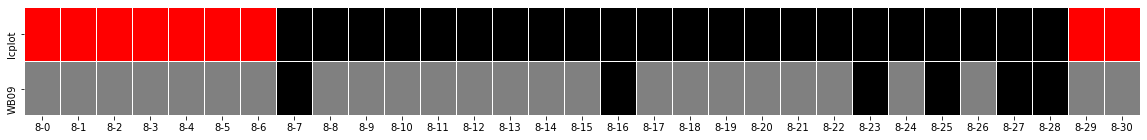

In [41]:
fig, a3 = plt.subplots(ncols=1, nrows=1, figsize=(20,2))
sns.heatmap(chr8_njdf[['lcplot', 'WB09']].T.astype(float), cmap=['Grey', 'Black', 'red' ],linecolor='white', linewidths=0.003,cbar=None, vmin=0, vmax=2, ax=a3)
plt.show()


<ipython-input-43-61315eba9515>:188: UserWarning: FixedFormatter should only be used together with FixedLocator
  a1.set_yticklabels(yt, size=12)


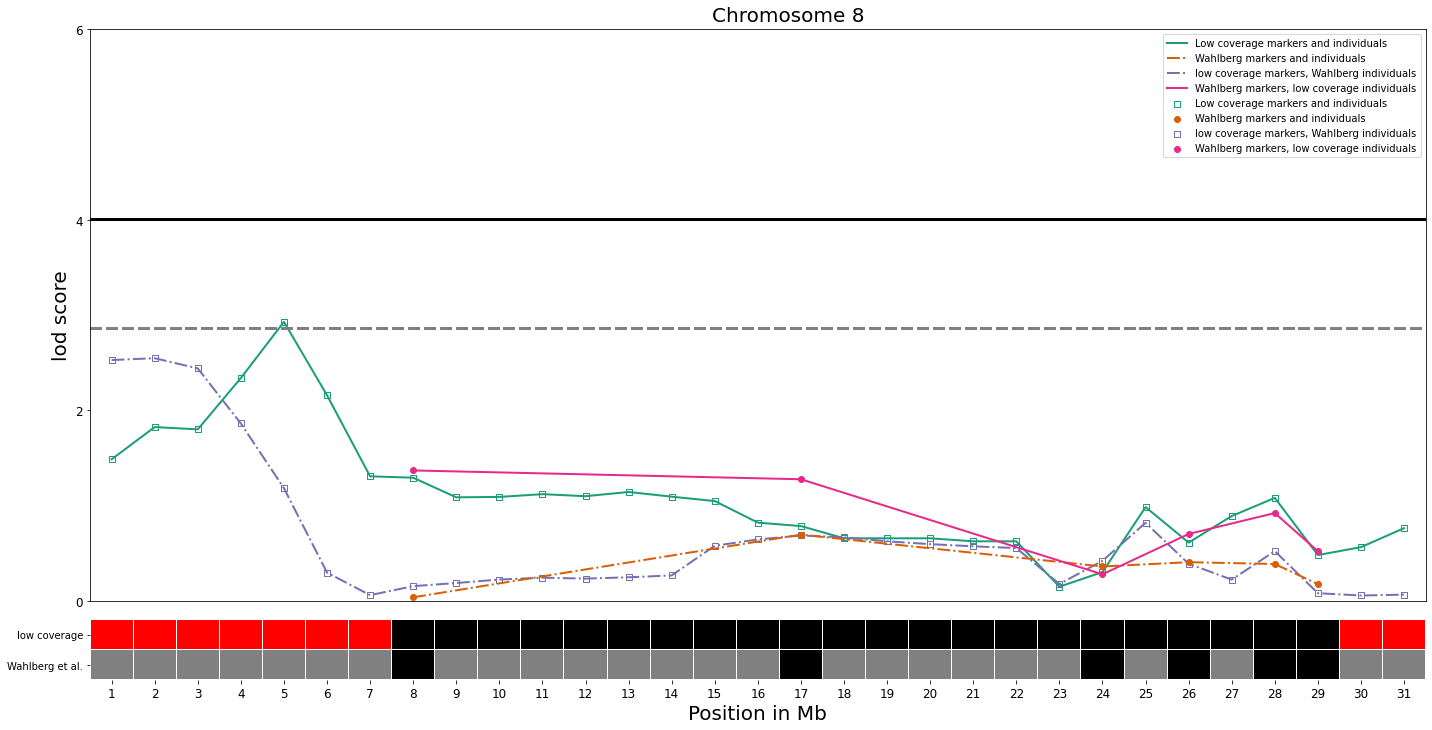

In [43]:
chr_to_plot = str(8)
shade_all = False


# make colors for the plot
#a = ['Grey', 'Black']
a = ['Black','Grey']

#a = ['Red', 'Black']
b=[]
for i in range(15):
    b = b+a



### Configure Ylabels     
yt = [
 plt.Text(0, 0.0, '0'),
 plt.Text(0, 2.0, '2'),
 plt.Text(0, 4.0, '4'),
 plt.Text(0, 6.0, '6'),]

ytt = np.array([0.,  2.,  4.,  6.])


xticks = []
xtl = []

for j, k in dd2:
    if j==chr_to_plot:

        for i, l in k.iterrows():
            xticks.append(l['loc'])
            xtl.append(l['marker'])

# reduce the number of xticks;
xticks = xticks[0::1]
xtl = xtl[0::1]
####################################################################################################
# plotting
labelpos = []
labelname = []
fig, (a1,a3) = plt.subplots(ncols=1, nrows=2, figsize=(20,10),gridspec_kw={'height_ratios':(190,20)})

for j, i in enumerate(dd2):
    if i[0]==chr_to_plot:
        #print(i[0],len(i[1]))
        l = i[1]
        a1.plot( l['loc']+0.5, l.lod, label='Low coverage markers and individuals', alpha=1, color='#1b9e77', lw=2, zorder=1) # plot the line
        a1.scatter( l['loc']+0.5, l.lod, label='Low coverage markers and individuals', alpha=1, color='#1b9e77', zorder=1, marker='s',facecolor='none') # plot the line

        #labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
        #labelname.append(i[0]) # append chromosome name to label-list

# plot the line for each chromosome
for j, i in enumerate(wbwb):
    if i[0]==chr_to_plot:
        l = i[1].dropna()

        #print(i[0],len(i[1]))
        a1.plot( l['loc']+0.5, l.lod, label='Wahlberg markers and individuals', alpha=1, color='#d95f02', lw=2, ls='dashdot', zorder=3) # plot the line
        a1.scatter( l['loc']+0.5, l.lod, label='Wahlberg markers and individuals', alpha=1, color='#d95f02', lw=1,zorder=3) # plot the line

        #labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
        #labelname.append(i[0]) # append chromosome name to label-list

for j, i in enumerate(wblc):
    if i[0]==chr_to_plot:
        l = i[1].dropna()
        #print(i[0],len(i[1]))
        a1.plot( l['loc']+0.5, l.lod, label='low coverage markers, Wahlberg individuals', alpha=1, color='#7570b3', lw=2, ls='dashdot') # plot the line
        a1.scatter( l['loc']+0.5, l.lod, label='low coverage markers, Wahlberg individuals', alpha=1, color='#7570b3', lw=1, marker='s', facecolor='none') # plot the line

        #labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
        #labelname.append(i[0]) # append chromosome name to label-list

for j, i in enumerate(lcwb):
    if i[0]==chr_to_plot:
        l = i[1].dropna()
        #print(i[0],len(i[1]))
        a1.plot( l['loc']+0.5, l.lod, label='Wahlberg markers, low coverage individuals', alpha=1, color='#e7298a', lw=2, zorder=5) # plot the line
        a1.scatter( l['loc']+0.5, l.lod, label='Wahlberg markers, low coverage individuals', alpha=1, color='#e7298a', lw=1,zorder=5) # plot the line

        #labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
        #labelname.append(i[0]) # append chromosome name to label-list



    a1.axhline(4.01, color='Black', lw=3 ) # 5% permutation threshold

    a1.axhline(0, color='Black', lw=1) # zero

    a1.axhline(2.86, color='Grey', lw=3, ls='--') # chr4 sig


#######################################################################################################
### plot lines for Zan 2017

for i, k in s2.iterrows():
    if k['Chromosome'] == int(chr_to_plot):
        ### simple line at left border ################################
        a1.axvline(k["loc"], color='lightgrey', lw=3, alpha=1, label='Zan2017')
for i, k in s3.iterrows():
    if k['Chromosome'] == int(chr_to_plot):
        ### simple line at left border ################################
        a1.axvline(k["loc"], color='lightgrey', lw=3, alpha=1, label='Zan2017', zorder=0)
        a1.axvline(k["loc"], color='Cyan', lw=3, alpha=1,ymin=0.11, ymax=0.125, label='Zan2017', zorder=3)


##########################################################################################
## Wahlberg 2009

#### stars on top of the peak to indicate they have been seen before

#plt.scatter(star_XY['loc'], [ i+1 for i in star_XY['lod']], color='red', marker='*')

### logic for making a line at the location where Wahlberg 2009  previous qtls have been seen

for i, k in wahlberg2009.iterrows():
    if k['Chromosome']==int(chr_to_plot):

        qtlleft = k['leftloc']
        qtlright = k['rightloc']

        #color all BW8 qtls red: #######################################

        if k['Trait']=='BW56':
        ### simple line at left border ################################
        #ax.axvline(qtlleft, color='red', lw=3, alpha=0.5, label="Wahlberg2009_BW56")
        ### shade between left and right border #######################
            a1.axvspan(qtlleft, qtlright, color='lightgrey', alpha=1,label="Wahlberg2009_BW56", zorder=0)





#######################################################################################################
### plot lines for Zan 2017

for i, k in s2.iterrows():
    if k['Chromosome']==int(chr_to_plot):
        ### simple line at left border ################################
        a1.axvline(k["loc"], color='Blue', lw=3, alpha=1,ymin=0.11, ymax=0.125, label='Zan2017', zorder=3)


#########################################################################################
## Wahlberg 2009

#### stars on top of the peak to indicate they have been seen before

#plt.scatter(star_XY['loc'], [ i+1 for i in star_XY['lod']], color='red', marker='*')

### logic for making a line at the location where Wahlberg 2009  previous qtls have been seen

for i, k in wahlberg2009.iterrows():
    if k['Chromosome']==int(chr_to_plot):

        qtlleft = k['leftloc']
        qtlright = k['rightloc']

    #color all BW8 qtls red: #######################################

        if k['Trait']=='BW56':
            ### simple line at left border ################################
            #ax.axvline(qtlleft, color='red', lw=3, alpha=0.5, label="Wahlberg2009_BW56")
            ### shade between left and right border #######################
            a1.axvspan(qtlleft, qtlright, color='red',ymax=0.025, alpha=1,label="Wahlberg2009_BW56", zorder=3)



handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(), loc='upper right')

sns.heatmap(chr8_njdf[['lcplot', 'WB09']].T.astype(float), cmap=['Grey', 'Black', 'red' ],linecolor='white', linewidths=0.03,cbar=None, vmin=0, vmax=2, ax=a3)
a3.set_yticklabels(['low coverage', 'Wahlberg et al.'])

#plt.legend()
a1.set_ylabel('lod score', size=20)
a1.set_xlabel('')

a3.set_xlabel('Position in Mb', size=20)
a1.set_xlim(xticks[0],xticks[-1])
a1.set_ylim(0,)
a1.set_xticks([])

a3.set_xticklabels([i.split("-")[1] for i in xtl][1:], size=12)
a1.set_yticklabels(yt, size=12)
a1.set_yticks(ytt)
#ytt = ax.get_yticks()
plt.tight_layout()
plt.suptitle('Chromosome {}'.format(chr_to_plot), size=20,x=0.55, y=1.01)
a1.legend()
plt.savefig('../results/figures/20210216_qtl_curve_chr{}_with_bindata.png'.format(chr_to_plot))
plt.show()

In [ ]:
#data2all.loc[data2all.marker.isin(chr1_peak)]['loc']

In [ ]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots( nrows=3, figsize=(30,10),)

#G = gridspec.GridSpec(3,10)
a1 = plt.subplot2grid((300,300),(0,0),colspan = 150,rowspan = 230, fig=fig)
a1.set_ylabel('a1')
a1.set_xticklabels([])

#a3 = plt.subplot2grid((3,24),(2,0),colspan = 10,rowspan = 1)
a2 = plt.subplot2grid((300,300),(230,0),colspan = 150,rowspan = 55)

a2.set_ylabel('mean \n marker density', rotation=0,labelpad=50)
a2.set_xticklabels([])


a3 = plt.subplot2grid((300,300),(290,0),colspan = 150,rowspan = 20)

a3.set_ylabel('  \n\n\n\n\n\n\n\n Wahlberg \n Markers', rotation=0, labelpad=50)




a4 = plt.subplot2grid((300,300),(0,155),colspan = 150,rowspan = 230)

a4.set_ylabel('')
a4.set_yticklabels([])

a5 = plt.subplot2grid((300,300),(230,155),colspan = 150,rowspan = 55)

a5.set_ylabel('')
a5.set_yticklabels([])


a6 = plt.subplot2grid((300,300),(290,155),colspan = 150,rowspan = 20)

a6.set_ylabel('')
a6.set_yticklabels([])

chr_to_plot = str(1)
shade_all = False


# make colors for the plot
#a = ['Grey', 'Black']
a = ['Black','Grey']

#a = ['Red', 'Black']
b=[]
for i in range(15):
    b = b+a



### Configure Ylabels     
yt = [
 plt.Text(0, -0.9, ''),
 plt.Text(0, -0.4, 'Zan 2017'),
 plt.Text(0, 0.0, '0'),
 plt.Text(0, 2.0, '2'),
 plt.Text(0, 4.0, '4'),
 plt.Text(0, 6.0, '6'),
 plt.Text(0, 8.0, '8'),
 plt.Text(0, 10.0, '10'),]
 #plt.Text(0, 12.0, '12'),
 #plt.Text(0, 14.0, '14'),
# plt.Text(0, 16.0, '16')]

ytt = np.array([-0.9, -0.4, 0.,  2.,  4.,  6.,  8., 10.,])
#12., 14., 16.])


xticks = []
xtl = []

for j, k in dd2:
    if j==chr_to_plot:

        for i, l in k.iterrows():
            if l['marker'] in chr1_peak:
                #print(l['marker'])
                xticks.append(l['loc'])
                xtl.append(l['marker'])

# reduce the number of xticks;
xticks = xticks[0::10]
xtl = xtl[0::10]
####################################################################################################
# plotting
labelpos = []
labelname = []

# plot the line for each chromosome
for j, i in enumerate(dd2):
    if i[0]==chr_to_plot:
        #print(i[0],len(i[1]))
        l = i[1].loc[i[1]['marker'].isin(chr1_peak)]

        a1.plot( l['loc'], l.lod, alpha=1, color='black', lw=1, zorder=1, label='all individuals, all markers') # plot the line
        a1.scatter( l['loc'], l.lod, alpha=1, color='black', zorder=1) # plot the line

        #labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
        #labelname.append(i[0]) # append chromosome name to label-list

# plot the line for each chromosome
for j, i in enumerate(wbwb):
    if i[0]==chr_to_plot:
        l = i[1].dropna()
        l = l.loc[l['marker'].isin(chr1_peak)]

        #print(i[0],len(i[1]))
        a1.plot( l['loc'], l.lod, alpha=1, color='Green', lw=1, ls='dashdot', zorder=3,label='Wahlberg individuals, wahlberg marker positions') # plot the line
        a1.scatter( l['loc'], l.lod, alpha=1, color='Green', lw=1,zorder=3) # plot the line

        #labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
        #labelname.append(i[0]) # append chromosome name to label-list

for j, i in enumerate(wblc):
    if i[0]==chr_to_plot:
        l = i[1].dropna()
        l = l.loc[l['marker'].isin(chr1_peak)]
        #print(i[0],len(i[1]))
        a1.plot( l['loc'], l.lod, alpha=1, color='Cyan', lw=1, ls='dashdot', label='Wahlberg individuals, all markers') # plot the line
        a1.scatter( l['loc'], l.lod, alpha=1, color='Cyan', lw=1,) # plot the line

        #labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
        #labelname.append(i[0]) # append chromosome name to label-list

for j, i in enumerate(lcwb):
    if i[0]==chr_to_plot:
        l = i[1].dropna()
        l = l.loc[l['marker'].isin(chr1_peak)]
        #print(i[0],len(i[1]))
        a1.plot( l['loc'], l.lod, alpha=1, color='Red', lw=2, ls='dashdot', zorder=5, label='all individuals, Wahlberg markers') # plot the line
        a1.scatter( l['loc'], l.lod, alpha=1, color='Red', lw=1,zorder=5) # plot the line

        #labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
        #labelname.append(i[0]) # append chromosome name to label-list




    a1.axhline(4.01, color='Black', lw=2 ) # 5% permutation threshold
    a1.axhline(2.86, color='Grey', lw=2, ls='--') # chr4 sig

    a1.axhline(0, color='Black', lw=1) # zero


#######################################################################################################
### plot lines for Zan 2017

for i, k in s2.iterrows():
    if k['Chromosome'] == int(chr_to_plot):
        if k['loc'] in data2all.loc[data2all.marker.isin(chr1_peak)]['loc']:
        ### simple line at left border ################################
            a1.axvline(k["loc"], color='lightgrey', lw=2, alpha=1, zorder=-3)
            a1.axvline(k["loc"], color='Blue', lw=2, alpha=1,ymin=0.025, ymax=0.05, zorder=3)

for i, k in s3.iterrows():
    if k['Chromosome'] == int(chr_to_plot):
        if k['loc'] in data2all.loc[data2all.marker.isin(chr1_peak)]['loc']:
        ### simple line at left border ################################
            a1.axvline(k["loc"], color='lightgrey', lw=2, alpha=1, zorder=-3)
            a1.axvline(k["loc"], color='Blue', lw=2, alpha=1,ymin=0.025, ymax=0.05, zorder=3)



##########################################################################################
## Wahlberg 2009

#### stars on top of the peak to indicate they have been seen before

#plt.scatter(star_XY['loc'], [ i+1 for i in star_XY['lod']], color='red', marker='*')

### logic for making a line at the location where Wahlberg 2009  previous qtls have been seen

for i, k in wahlberg2009.iterrows():
    if k['Chromosome']==int(chr_to_plot):
    
        qtlleft = k['leftloc']
        qtlright = k['rightloc']
        if k['leftloc'] in data2all.loc[data2all.marker.isin(chr1_peak)]['loc']:
            if k['rightloc'] in data2all.loc[data2all.marker.isin(chr1_peak)]['loc']:



        #color all BW8 qtls red: #######################################

                if k['Trait']=='BW56':

                    
        ### shade between left and right border #######################
                    a1.axvspan(qtlleft, qtlright, color='lightgrey', alpha=1,label="Wahlberg2009_BW56", zorder=-3)

                    a1.axvspan(qtlleft, qtlright, color='red',ymax=0.025, alpha=1,label="Wahlberg2009_BW56", zorder=3)



handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(), loc='upper right')


#plt.legend()
a1.set_ylabel('lod score', size=20)
a3.set_xlabel('Position in Mb \n Chromosome 1', size=20)
a1.set_ylim(-1,10)
a1.set_xticks(xticks)

a1.set_xticklabels([i.split("-")[1] for i in xtl], size=7)
a1.set_yticklabels(yt, size=12)
a1.set_yticks(ytt)




chr_to_plot = str(4)
shade_all = False


# make colors for the plot
#a = ['Grey', 'Black']
a = ['Black','Grey']

#a = ['Red', 'Black']
b=[]
for i in range(15):
    b = b+a



### Configure Ylabels     
yt = [
 plt.Text(0, -0.9, ''),
 plt.Text(0, -0.4, 'Zan 2017'),
 plt.Text(0, 0.0, '0'),
 plt.Text(0, 2.0, '2'),
 plt.Text(0, 4.0, '4'),
 plt.Text(0, 6.0, '6'),
 plt.Text(0, 8.0, '8'),
 plt.Text(0, 10.0, '10'),]
# plt.Text(0, 12.0, '12'),
# plt.Text(0, 14.0, '14'),
# plt.Text(0, 16.0, '16')]

ytt = np.array([-0.9, -0.4, 0.,  2.,  4.,  6.,  8., 10.,])
#12., 14., 16.])


xticks = []
xtl = []

for j, k in dd2:
    if j==chr_to_plot:

        for i, l in k.iterrows():
            if l['marker'] in chr4_peak:
                #print(l['marker'])
                xticks.append(l['loc'])
                xtl.append(l['marker'])

# reduce the number of xticks;
xticks = xticks[0::10]
xtl = xtl[0::10]
####################################################################################################
# plotting
labelpos = []
labelname = []

# plot the line for each chromosome
for j, i in enumerate(dd2):
    if i[0]==chr_to_plot:
        #print(i[0],len(i[1]))
        l = i[1].loc[i[1]['marker'].isin(chr4_peak)]

        a4.plot( l['loc'], l.lod, label='all', alpha=1, color='black', lw=1, zorder=1) # plot the line
        a4.scatter( l['loc'], l.lod, label='all', alpha=1, color='black', zorder=1) # plot the line

        #labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
        #labelname.append(i[0]) # append chromosome name to label-list

# plot the line for each chromosome
for j, i in enumerate(wbwb):
    if i[0]==chr_to_plot:
        l = i[1].dropna()
        l = l.loc[l['marker'].isin(chr4_peak)]

        #print(i[0],len(i[1]))
        a4.plot( l['loc'], l.lod, label='all', alpha=1, color='Green', lw=1, ls='dashdot', zorder=3) # plot the line
        a4.scatter( l['loc'], l.lod, label='all', alpha=1, color='Green', lw=1,zorder=3) # plot the line

        #labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
        #labelname.append(i[0]) # append chromosome name to label-list

for j, i in enumerate(wblc):
    if i[0]==chr_to_plot:
        l = i[1].dropna()
        l = l.loc[l['marker'].isin(chr4_peak)]
        #print(i[0],len(i[1]))
        a4.plot( l['loc'], l.lod, label='all', alpha=1, color='Cyan', lw=1, ls='dashdot') # plot the line
        a4.scatter( l['loc'], l.lod, label='all', alpha=1, color='Cyan', lw=1,) # plot the line

        #labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
        #labelname.append(i[0]) # append chromosome name to label-list

for j, i in enumerate(lcwb):
    if i[0]==chr_to_plot:
        l = i[1].dropna()
        l = l.loc[l['marker'].isin(chr4_peak)]
        #print(i[0],len(i[1]))
        a4.plot( l['loc'], l.lod, label='all', alpha=1, color='Red', lw=2, ls='dashdot', zorder=5) # plot the line
        a4.scatter( l['loc'], l.lod, label='all', alpha=1, color='Red', lw=1,zorder=5) # plot the line

        #labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
        #labelname.append(i[0]) # append chromosome name to label-list




    a4.axhline(4.01, color='Black', lw=2 ) # 5% permutation threshold
    a4.axhline(2.86, color='Grey', lw=2, ls='--') # chr4 sig

    a4.axhline(0, color='Black', lw=1) # zero


#######################################################################################################
### plot lines for Zan 2017

for i, k in s2.iterrows():
    if k['Chromosome'] == int(chr_to_plot):
        if k['loc'] in data2all.loc[data2all.marker.isin(chr4_peak)]['loc']:

        ### simple line at left border ################################
            a4.axvline(k["loc"], color='lightgrey', lw=2, alpha=1, zorder=-3)
            a4.axvline(k["loc"], color='Blue', lw=2, alpha=1,ymin=0.025, ymax=0.05, zorder=3)

for i, k in s3.iterrows():
    if k['Chromosome'] == int(chr_to_plot):
        if k['loc'] in data2all.loc[data2all.marker.isin(chr4_peak)]['loc']:

        ### simple line at left border ################################
            a4.axvline(k["loc"], color='lightgrey', lw=2, alpha=1, zorder=-3)
            a4.axvline(k["loc"], color='Blue', lw=2, alpha=1,ymin=0.025, ymax=0.05, zorder=3)



##########################################################################################
## Wahlberg 2009

#### stars on top of the peak to indicate they have been seen before

#plt.scatter(star_XY['loc'], [ i+1 for i in star_XY['lod']], color='red', marker='*')

### logic for making a line at the location where Wahlberg 2009  previous qtls have been seen

for i, k in wahlberg2009.iterrows():
    if k['Chromosome']==int(chr_to_plot):

        qtlleft = k['leftloc']
        qtlright = k['rightloc']
        
        if k['leftloc'] in data2all.loc[data2all.marker.isin(chr4_peak)]['loc']:
            if k['rightloc'] in data2all.loc[data2all.marker.isin(chr4_peak)]['loc']:


        #color all BW8 qtls red: #######################################

                if k['Trait']=='BW56':
        ### simple line at left border ################################
        #ax.axvline(qtlleft, color='red', lw=3, alpha=0.5, label="Wahlberg2009_BW56")
        ### shade between left and right border #######################
                    a4.axvspan(qtlleft, qtlright, color='lightgrey', alpha=1,label="Wahlberg2009_BW56", zorder=-3)

                    a4.axvspan(qtlleft, qtlright, color='red',ymax=0.025, alpha=1,label="Wahlberg2009_BW56", zorder=3)



handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(), loc='upper right')


#plt.legend()
#a4.set_ylabel('lod score', size=20)
a6.set_xlabel('Position in Mb \n Chromosome 4', size=20)
a4.set_ylim(-1,10)
a4.set_xticks(xticks)

a4.set_xticklabels([i.split("-")[1] for i in xtl], size=7)
a4.set_yticklabels([])
#a4.set_yticklabels(yt, size=12)
a4.set_yticks(ytt)


a2.bar( x=range(25,66),height=density[chr1_peak].mean(axis=0), width=1, color='black')
a2.set_ylim(0,600)
a2.set_xlim(25,66)

a3.bar(x=range(25,66),height=j3['Wahlberg 2009'][chr1_peak], width=0.2, color='black')
a3.set_ylim(0,1)
a3.set_xlim(25,66)
a3.set_yticklabels([])


a5.bar( x=range(25,66),height=density[chr4_peak].mean(axis=0), width=1, color='black')
a5.set_ylim(0,600)
a5.set_xticklabels([])

a5.set_xlim(25,66)

a6.bar(x=range(10,51),height=j3['Wahlberg 2009'][chr4_peak], width=0.2, color='black')
a6.set_ylim(0,1)
a6.set_xlim(10,51)
a6.set_yticklabels([])

a1.legend(loc='upper left')
plt.show()



In [ ]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots( nrows=3, figsize=(30,10),)

#G = gridspec.GridSpec(3,10)
a1 = plt.subplot2grid((300,300),(0,0),colspan = 150,rowspan = 230, fig=fig)
a1.set_ylabel('a1')
a1.set_xticklabels([])

#a3 = plt.subplot2grid((3,24),(2,0),colspan = 10,rowspan = 1)
a2 = plt.subplot2grid((300,300),(230,0),colspan = 150,rowspan = 55)

a2.set_ylabel('mean \n marker density', rotation=0,labelpad=50)
a2.set_xticklabels([])


a3 = plt.subplot2grid((300,300),(290,0),colspan = 150,rowspan = 20)

a3.set_ylabel('  \n\n\n\n\n\n\n\n Wahlberg \n Markers', rotation=0, labelpad=50)




a4 = plt.subplot2grid((300,300),(0,155),colspan = 150,rowspan = 230)

a4.set_ylabel('')
a4.set_yticklabels([])

a5 = plt.subplot2grid((300,300),(230,155),colspan = 150,rowspan = 55)

a5.set_ylabel('')
a5.set_yticklabels([])


a6 = plt.subplot2grid((300,300),(290,155),colspan = 150,rowspan = 20)

a6.set_ylabel('')
a6.set_yticklabels([])

chr_to_plot = str(1)
shade_all = False


# make colors for the plot
#a = ['Grey', 'Black']
a = ['Black','Grey']

#a = ['Red', 'Black']
b=[]
for i in range(15):
    b = b+a



### Configure Ylabels     
yt = [
 plt.Text(0, -0.9, ''),
 plt.Text(0, -0.4, 'Zan 2017'),
 plt.Text(0, 0.0, '0'),
 plt.Text(0, 2.0, '2'),
 plt.Text(0, 4.0, '4'),
 plt.Text(0, 6.0, '6'),
 plt.Text(0, 8.0, '8'),
 plt.Text(0, 10.0, '10'),]
 #plt.Text(0, 12.0, '12'),
 #plt.Text(0, 14.0, '14'),
# plt.Text(0, 16.0, '16')]

ytt = np.array([-0.9, -0.4, 0.,  2.,  4.,  6.,  8., 10.,])
#12., 14., 16.])


xticks = []
xtl = []

for j, k in dd2:
    if j==chr_to_plot:

        for i, l in k.iterrows():
            if l['marker'] in chr1_peak:
                #print(l['marker'])
                xticks.append(l['loc'])
                xtl.append(l['marker'])

# reduce the number of xticks;
xticks = xticks[0::10]
xtl = xtl[0::10]
####################################################################################################
# plotting
labelpos = []
labelname = []

# plot the line for each chromosome
for j, i in enumerate(dd2):
    if i[0]==chr_to_plot:
        #print(i[0],len(i[1]))
        l = i[1].loc[i[1]['marker'].isin(chr1_peak)]

        a1.plot( l['loc'], l.lod, alpha=1, color='#1b9e77', lw=2, zorder=1, label='all individuals, all markers') # plot the line
        a1.scatter( l['loc'], l.lod, alpha=1, color='#1b9e77', zorder=1, marker='s', facecolor='none')

        #labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
        #labelname.append(i[0]) # append chromosome name to label-list

# plot the line for each chromosome
for j, i in enumerate(wbwb):
    if i[0]==chr_to_plot:
        l = i[1].dropna()
        l = l.loc[l['marker'].isin(chr1_peak)]

        #print(i[0],len(i[1]))
        a1.plot( l['loc'], l.lod, alpha=1, color='#d95f02', lw=2, ls='dashdot', zorder=3,label='Wahlberg individuals, wahlberg marker positions') # plot the line
        a1.scatter( l['loc'], l.lod, alpha=1, color='#d95f02', lw=1,zorder=3) # plot the line

        #labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
        #labelname.append(i[0]) # append chromosome name to label-list

for j, i in enumerate(wblc):
    if i[0]==chr_to_plot:
        l = i[1].dropna()
        l = l.loc[l['marker'].isin(chr1_peak)]
        #print(i[0],len(i[1]))
        a1.plot( l['loc'], l.lod, alpha=1, color='#7570b3', lw=2,ls='dashdot', label='Wahlberg individuals, all markers') # plot the line
        a1.scatter( l['loc'], l.lod, alpha=1, color='#7570b3', lw=1,marker='s', facecolor='none') # plot the line

        #labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
        #labelname.append(i[0]) # append chromosome name to label-list

for j, i in enumerate(lcwb):
    if i[0]==chr_to_plot:
        l = i[1].dropna()
        l = l.loc[l['marker'].isin(chr1_peak)]
        #print(i[0],len(i[1]))
        a1.plot( l['loc'], l.lod, alpha=1, color='#e7298a', lw=2, zorder=5, label='all individuals, Wahlberg markers') # plot the line
        a1.scatter( l['loc'], l.lod, alpha=1, color='#e7298a', lw=1,zorder=5, marker='o') # plot the line

        #labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
        #labelname.append(i[0]) # append chromosome name to label-list




    a1.axhline(4.01, color='Black', lw=2 ) # 5% permutation threshold
    a1.axhline(2.86, color='Grey', lw=2, ls='--') # chr4 sig

    a1.axhline(0, color='Black', lw=1) # zero


#######################################################################################################
### plot lines for Zan 2017

for i, k in s2.iterrows():
    if k['Chromosome'] == int(chr_to_plot):
        if k['loc'] in data2all.loc[data2all.marker.isin(chr1_peak)]['loc']:
        ### simple line at left border ################################
            a1.axvline(k["loc"], color='lightgrey', lw=2, alpha=1, zorder=-3)
            a1.axvline(k["loc"], color='Blue', lw=2, alpha=1,ymin=0.025, ymax=0.05, zorder=3)

for i, k in s3.iterrows():
    if k['Chromosome'] == int(chr_to_plot):
        if k['loc'] in data2all.loc[data2all.marker.isin(chr1_peak)]['loc']:
        ### simple line at left border ################################
            a1.axvline(k["loc"], color='lightgrey', lw=2, alpha=1, zorder=-3)
            a1.axvline(k["loc"], color='Blue', lw=2, alpha=1,ymin=0.025, ymax=0.05, zorder=3)



##########################################################################################
## Wahlberg 2009

#### stars on top of the peak to indicate they have been seen before

#plt.scatter(star_XY['loc'], [ i+1 for i in star_XY['lod']], color='red', marker='*')

### logic for making a line at the location where Wahlberg 2009  previous qtls have been seen

for i, k in wahlberg2009.iterrows():
    if k['Chromosome']==int(chr_to_plot):
    
        qtlleft = k['leftloc']
        qtlright = k['rightloc']
        if k['leftloc'] in data2all.loc[data2all.marker.isin(chr1_peak)]['loc']:
            if k['rightloc'] in data2all.loc[data2all.marker.isin(chr1_peak)]['loc']:



        #color all BW8 qtls red: #######################################

                if k['Trait']=='BW56':

                    
        ### shade between left and right border #######################
                    a1.axvspan(qtlleft, qtlright, color='lightgrey', alpha=1,label="Wahlberg2009_BW56", zorder=-3)

                    a1.axvspan(qtlleft, qtlright, color='red',ymax=0.025, alpha=1,label="Wahlberg2009_BW56", zorder=3)



handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(), loc='upper right')


#plt.legend()
a1.set_ylabel('lod score', size=20)
a3.set_xlabel('Position in Mb \n Chromosome 1', size=20)
a1.set_ylim(-1,10)
a1.set_xticks(xticks)

a1.set_xticklabels([i.split("-")[1] for i in xtl], size=7)
a1.set_yticklabels(yt, size=12)
a1.set_yticks(ytt)
a1.set_xlim(xticks[0], xticks[-1])




chr_to_plot = str(4)
shade_all = False


# make colors for the plot
#a = ['Grey', 'Black']
a = ['Black','Grey']

#a = ['Red', 'Black']
b=[]
for i in range(15):
    b = b+a



### Configure Ylabels     
yt = [
 plt.Text(0, -0.9, ''),
 plt.Text(0, -0.4, 'Zan 2017'),
 plt.Text(0, 0.0, '0'),
 plt.Text(0, 2.0, '2'),
 plt.Text(0, 4.0, '4'),
 plt.Text(0, 6.0, '6'),
 plt.Text(0, 8.0, '8'),
 plt.Text(0, 10.0, '10'),]
# plt.Text(0, 12.0, '12'),
# plt.Text(0, 14.0, '14'),
# plt.Text(0, 16.0, '16')]

ytt = np.array([-0.9, -0.4, 0.,  2.,  4.,  6.,  8., 10.,])
#12., 14., 16.])


xticks = []
xtl = []

for j, k in dd2:
    if j==chr_to_plot:

        for i, l in k.iterrows():
            if l['marker'] in chr4_peak:
                #print(l['marker'])
                xticks.append(l['loc'])
                xtl.append(l['marker'])

# reduce the number of xticks;
xticks = xticks[0::10]
xtl = xtl[0::10]
####################################################################################################
# plotting
labelpos = []
labelname = []

# plot the line for each chromosome
for j, i in enumerate(dd2):
    if i[0]==chr_to_plot:
        #print(i[0],len(i[1]))
        l = i[1].loc[i[1]['marker'].isin(chr4_peak)]

        a4.plot( l['loc'], l.lod, label='all', alpha=1, color='#1b9e77', lw=2, zorder=1) # plot the line
        a4.scatter( l['loc'], l.lod, label='all', alpha=1, color='#1b9e77', zorder=1, marker='s',facecolor='none') # plot the line

        #labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
        #labelname.append(i[0]) # append chromosome name to label-list

# plot the line for each chromosome
for j, i in enumerate(wbwb):
    if i[0]==chr_to_plot:
        l = i[1].dropna()
        l = l.loc[l['marker'].isin(chr4_peak)]

        #print(i[0],len(i[1]))
        a4.plot( l['loc'], l.lod, label='all', alpha=1, color='#d95f02', lw=2, ls='dashdot', zorder=3) # plot the line
        a4.scatter( l['loc'], l.lod, label='all', alpha=1, color='#d95f02', lw=1,zorder=3) # plot the line

        #labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
        #labelname.append(i[0]) # append chromosome name to label-list

for j, i in enumerate(wblc):
    if i[0]==chr_to_plot:
        l = i[1].dropna()
        l = l.loc[l['marker'].isin(chr4_peak)]
        #print(i[0],len(i[1]))
        a4.plot( l['loc'], l.lod, label='all', alpha=1, color='#7570b3', lw=2, ls='dashdot') # plot the line
        a4.scatter( l['loc'], l.lod, label='all', alpha=1, color='#7570b3', lw=1, marker='s', facecolor='none') # plot the line

        #labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
        #labelname.append(i[0]) # append chromosome name to label-list

for j, i in enumerate(lcwb):
    if i[0]==chr_to_plot:
        l = i[1].dropna()
        l = l.loc[l['marker'].isin(chr4_peak)]
        #print(i[0],len(i[1]))
        a4.plot( l['loc'], l.lod, label='all', alpha=1, color='#e7298a', lw=2, zorder=5) # plot the line
        a4.scatter( l['loc'], l.lod, label='all', alpha=1, color='#e7298a', lw=1,zorder=5) # plot the line

        #labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
        #labelname.append(i[0]) # append chromosome name to label-list




    a4.axhline(4.01, color='Black', lw=2 ) # 5% permutation threshold
    a4.axhline(2.86, color='Grey', lw=2, ls='--') # chr4 sig

    a4.axhline(0, color='Black', lw=1) # zero


#######################################################################################################
### plot lines for Zan 2017

for i, k in s2.iterrows():
    if k['Chromosome'] == int(chr_to_plot):
        if k['loc'] in data2all.loc[data2all.marker.isin(chr4_peak)]['loc']:

        ### simple line at left border ################################
            a4.axvline(k["loc"], color='lightgrey', lw=2, alpha=1, zorder=-3)
            a4.axvline(k["loc"], color='Blue', lw=2, alpha=1,ymin=0.025, ymax=0.05, zorder=3)

for i, k in s3.iterrows():
    if k['Chromosome'] == int(chr_to_plot):
        if k['loc'] in data2all.loc[data2all.marker.isin(chr4_peak)]['loc']:

        ### simple line at left border ################################
            a4.axvline(k["loc"], color='lightgrey', lw=2, alpha=1, zorder=-3)
            a4.axvline(k["loc"], color='Blue', lw=2, alpha=1,ymin=0.025, ymax=0.05, zorder=3)



##########################################################################################
## Wahlberg 2009

#### stars on top of the peak to indicate they have been seen before

#plt.scatter(star_XY['loc'], [ i+1 for i in star_XY['lod']], color='red', marker='*')

### logic for making a line at the location where Wahlberg 2009  previous qtls have been seen

for i, k in wahlberg2009.iterrows():
    if k['Chromosome']==int(chr_to_plot):

        qtlleft = k['leftloc']
        qtlright = k['rightloc']
        
        if k['leftloc'] in data2all.loc[data2all.marker.isin(chr4_peak)]['loc']:
            if k['rightloc'] in data2all.loc[data2all.marker.isin(chr4_peak)]['loc']:


        #color all BW8 qtls red: #######################################

                if k['Trait']=='BW56':
        ### simple line at left border ################################
        #ax.axvline(qtlleft, color='red', lw=3, alpha=0.5, label="Wahlberg2009_BW56")
        ### shade between left and right border #######################
                    a4.axvspan(qtlleft, qtlright, color='lightgrey', alpha=1,label="Wahlberg2009_BW56", zorder=-3)

                    a4.axvspan(qtlleft, qtlright, color='red',ymax=0.025, alpha=1,label="Wahlberg2009_BW56", zorder=3)



handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(), loc='upper right')


#plt.legend()
#a4.set_ylabel('lod score', size=20)
a6.set_xlabel('Position in Mb \n Chromosome 4', size=20)
a4.set_ylim(-1,10)
a4.set_xticks(xticks)

a4.set_xticklabels([i.split("-")[1] for i in xtl], size=7)
a4.set_yticklabels([])
#a4.set_yticklabels(yt, size=12)
a4.set_yticks(ytt)


a2.bar( x=range(25,66),height=density[chr1_peak].mean(axis=0), width=1, color='black')
a2.set_ylim(0,600)
a2.set_xlim(25,66)

a3.bar(x=range(25,66),height=j3['Wahlberg 2009'][chr1_peak], width=0.2, color='black')
a3.set_ylim(0,1)
a3.set_xlim(25,66)
a3.set_yticklabels([])


a5.bar( x=range(25,66),height=density[chr4_peak].mean(axis=0), width=1, color='black')
a5.set_ylim(0,600)
a5.set_xticklabels([])

a5.set_xlim(25,66)

a6.bar(x=range(10,51),height=j3['Wahlberg 2009'][chr4_peak], width=0.2, color='black')
a6.set_ylim(0,1)
a6.set_xlim(10,51)
a6.set_yticklabels([])

a1.legend(loc='upper left')

a4.set_xlim(xticks[0], xticks[-1])
plt.savefig('../results/figures/20210207_chr1chr4_comparison_with_wahlberg_panel.pdf')
plt.show()



In [ ]:
hr1_peak = []
for i in range(25, 66):
    chr1_peak.append('1-'+str(i))
chr4_peak = []
for i in range(10, 51):
    chr4_peak.append('4-'+str(i))